In [486]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [487]:
df=pd.read_csv('/Users/srivainavi/CPC/Analytics/assignment_files/training_set.csv')

In [488]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


<Axes: >

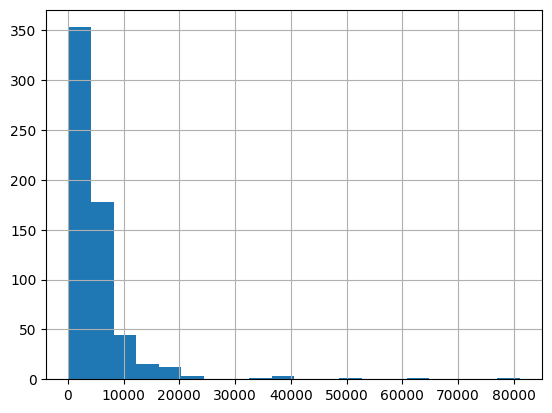

In [489]:
df['ApplicantIncome'].hist(bins=20)

<Axes: >

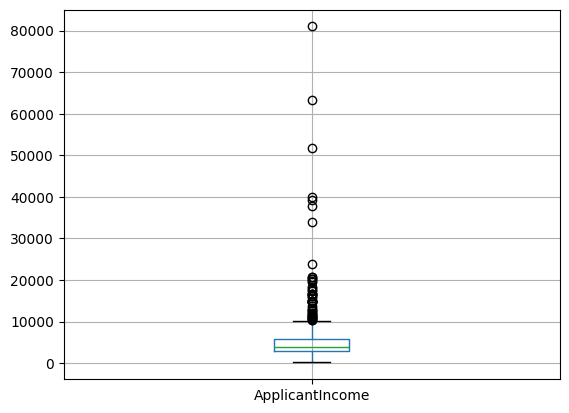

In [490]:
df.boxplot(column='ApplicantIncome')

<Axes: >

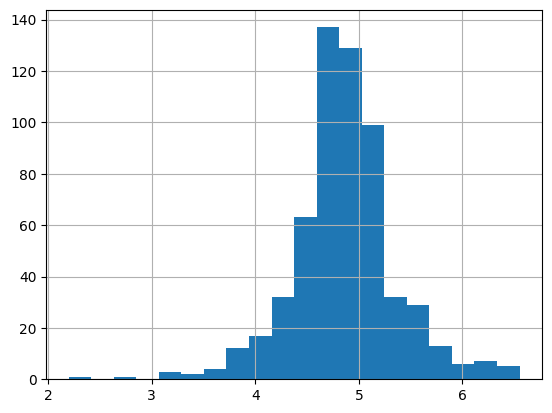

In [491]:
df['LogLoanAmount']=np.log(dataset['LoanAmount'])
df['LogLoanAmount'].hist(bins=20)


In [492]:
df['Gender'].fillna(df['Gender'].mode(),inplace=True)
df['Married'].fillna(df['Married'].mode(),inplace=True)
df['Dependents'].fillna(df['Dependents'].mode(),inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode(),inplace=True)
df['LogLoanAmount'].fillna(df['LogLoanAmount'].median(), inplace=True)
df['ApplicantIncome'].fillna(df['ApplicantIncome'].median(), inplace=True)
df['CoapplicantIncome'].fillna(df['CoapplicantIncome'].median(), inplace=True)
df['Credit_History'].fillna(df['Credit_History'].median(), inplace=True)

/var/folders/hl/py3b6qpn6y577v37jcfkhp8c0000gp/T/ipykernel_5808/3746522382.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode(),inplace=True)
/var/folders/hl/py3b6qpn6y577v37jcfkhp8c0000gp/T/ipykernel_5808/3746522382.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values a

In [493]:
df.isnull().sum()

Loan_ID               0
Gender               15
Married               3
Dependents           15
Education             1
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
property_Area         0
Loan_Status           0
LogLoanAmount         0
dtype: int64

In [494]:
df['TotIncome']=df['ApplicantIncome']+df['CoapplicantIncome']
df['TotalIncomeLog']=np.log(df['TotIncome'])

In [495]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Loan_Status,LogLoanAmount,TotIncome,TotalIncomeLog
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y,4.852030,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,3806.0,1508.0,128.0,360.0,1.0,Rural,N,4.852030,5314.0,8.578100
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515


<Axes: >

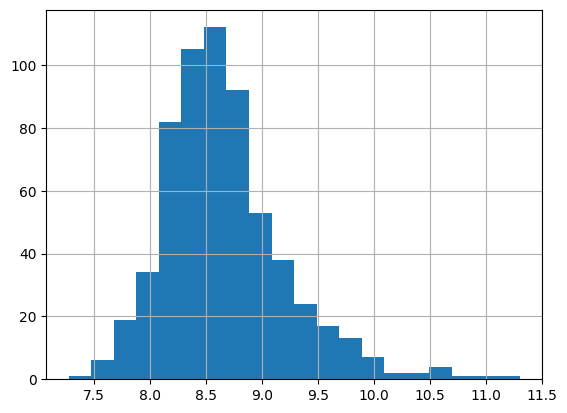

In [496]:
df['TotalIncomeLog'].hist(bins=20)

In [497]:
x=df.iloc[:,np.r_[1:5,9:11,13:15]].values
y=df.iloc[:,12].values

In [498]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

In [499]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X=LabelEncoder()

In [500]:
for i in range(0,5):
    xtrain[:,i]=labelencoder_X.fit_transform(xtrain[:,i])

xtrain[:,7]=labelencoder_X.fit_transform(xtrain[:,7])

In [501]:
labelencoder_Y=LabelEncoder()
ytrain=labelencoder_Y.fit_transform(ytrain)

In [502]:
for i in range(0,5):
    xtest[:,i]=labelencoder_X.fit_transform(xtest[:,i])

xtest[:,7]=labelencoder_X.fit_transform(xtest[:,7])

In [503]:
labelencoder_Y=LabelEncoder()
ytest=labelencoder_Y.fit_transform(ytest)

In [504]:
ytest

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

In [505]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on Xtrain and transform Xtrain
xtrain = scaler.fit_transform(xtrain)

# Transform Xtest using the same scaler
xtest = scaler.transform(xtest)


Training Logistic Regression with GridSearchCV...
Logistic Regression:
  Accuracy: 0.8293
  Precision: 0.8224
  Recall: 0.9778
  F1-Score: 0.8934
  ROC AUC: 0.7589
Training Decision Tree with GridSearchCV...
Decision Tree:
  Accuracy: 0.8130
  Precision: 0.8317
  Recall: 0.9333
  F1-Score: 0.8796
  ROC AUC: 0.7071
Training Random Forest with GridSearchCV...
Random Forest:
  Accuracy: 0.7886
  Precision: 0.8265
  Recall: 0.9000
  F1-Score: 0.8617
  ROC AUC: 0.7209
Training Support Vector Machine with GridSearchCV...
Support Vector Machine:
  Accuracy: 0.8293
  Precision: 0.8224
  Recall: 0.9778
  F1-Score: 0.8934
  ROC AUC: 0.7845


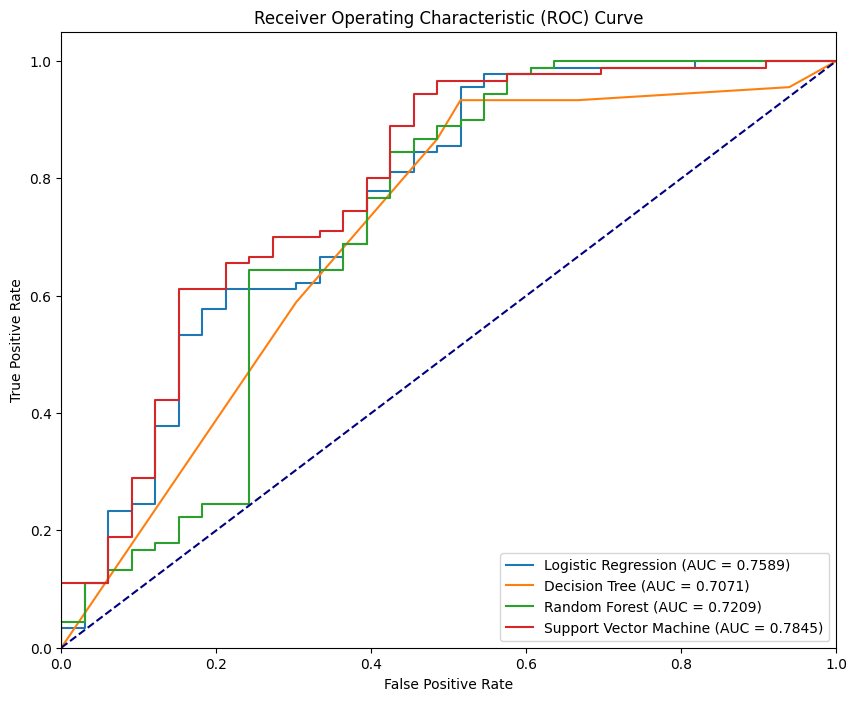

In [506]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import joblib  # For saving models

# List of classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(probability=True)
}

# Hyperparameter grids for GridSearchCV (for key features)
param_grids = {
    "Logistic Regression": {
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['liblinear', 'saga']
    },
    "Decision Tree": {
        'max_depth': [3, 5, 10, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    "Random Forest": {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 10, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    "Support Vector Machine": {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    }
}

# Function to evaluate, plot ROC curve, and save models with GridSearchCV
def evaluate_and_save_models_with_gridsearch(classifiers, param_grids, Xtrain, Xtest, ytrain, ytest):
    plt.figure(figsize=(10, 8))
    
    for name, model in classifiers.items():
        print(f"Training {name} with GridSearchCV...")
        
        # Perform GridSearchCV with the given hyperparameter grid
        grid_search = GridSearchCV(estimator=model, param_grid=param_grids[name], cv=5, scoring='accuracy')
        grid_search.fit(Xtrain, ytrain)
        
        # Best model from grid search
        best_model = grid_search.best_estimator_

        # Save the trained model
        joblib.dump(best_model, f"{name}_best_model.joblib")
        
        # Make predictions
        ypred = best_model.predict(Xtest)
        yprob = best_model.predict_proba(Xtest)[:, 1]  # For ROC AUC
        
        # Calculate metrics
        accuracy = accuracy_score(ytest, ypred)
        precision = precision_score(ytest, ypred)
        recall = recall_score(ytest, ypred)
        f1 = f1_score(ytest, ypred)
        roc_auc = roc_auc_score(ytest, yprob)
        
        # Print the metrics
        print(f"{name}:")
        print(f"  Accuracy: {accuracy:.4f}")
        print(f"  Precision: {precision:.4f}")
        print(f"  Recall: {recall:.4f}")
        print(f"  F1-Score: {f1:.4f}")
        print(f"  ROC AUC: {roc_auc:.4f}")
        
        # Plot ROC curve
        fpr, tpr, _ = roc_curve(ytest, yprob)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.4f})')
    
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

# Evaluate, plot ROC curve, and save models with GridSearchCV
evaluate_and_save_models_with_gridsearch(classifiers, param_grids, xtrain, xtest, ytrain, ytest)


In [507]:
tf=pd.read_csv('/Users/srivainavi/CPC/Analytics/assignment_files/testing_set.csv')

In [508]:
import numpy as np

# Apply transformations
tf['LogLoanAmount'] = np.log(tf['LoanAmount'])
tf['Gender'].fillna(tf['Gender'].mode()[0], inplace=True)
tf['Married'].fillna(tf['Married'].mode()[0], inplace=True)
tf['Dependents'].fillna(tf['Dependents'].mode()[0], inplace=True)
tf['Self_Employed'].fillna(tf['Self_Employed'].mode()[0], inplace=True)
tf['LogLoanAmount'].fillna(tf['LogLoanAmount'].median(), inplace=True)
tf['ApplicantIncome'].fillna(tf['ApplicantIncome'].median(), inplace=True)
tf['CoapplicantIncome'].fillna(tf['CoapplicantIncome'].median(), inplace=True)
tf['Credit_History'].fillna(tf['Credit_History'].median(), inplace=True)
tf['TotIncome'] = tf['ApplicantIncome'] + tf['CoapplicantIncome']
tf['TotalIncomeLog'] = np.log(tf['TotIncome'])


/var/folders/hl/py3b6qpn6y577v37jcfkhp8c0000gp/T/ipykernel_5808/656405154.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tf['Gender'].fillna(tf['Gender'].mode()[0], inplace=True)
/var/folders/hl/py3b6qpn6y577v37jcfkhp8c0000gp/T/ipykernel_5808/656405154.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values

In [509]:
tf.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,LogLoanAmount,TotIncome,TotalIncomeLog
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,4.700480,5720,8.651724
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,4.836282,4576,8.428581
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,5.337538,6800,8.824678
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,4.605170,4886,8.494129
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,4.356709,3276,8.094378


In [510]:
x=tf.iloc[:,np.r_[1:5,9:11,13:15]].values

In [511]:
for i in range(0,5):
    x[:,i]=labelencoder_X.fit_transform(x[:,i])

x[:,7]=labelencoder_X.fit_transform(x[:,7])

In [512]:
x

array([[1, 1, 0, ..., 1.0, 5720, 207],
       [1, 1, 1, ..., 1.0, 4576, 124],
       [1, 1, 2, ..., 1.0, 6800, 251],
       ...,
       [1, 0, 0, ..., 1.0, 5243, 174],
       [1, 1, 0, ..., 1.0, 7393, 268],
       [1, 0, 0, ..., 1.0, 9200, 311]], shape=(367, 8), dtype=object)

In [513]:
x=scaler.fit_transform(x)

In [514]:
import joblib  # For loading the saved model

# Load the saved SVM model
svm_model = joblib.load('Support Vector Machine_model.joblib')

# Make predictions on the new data 'x'
predictions = svm_model.predict(x)

# Print the predictions
print(predictions)


[1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]


In [515]:
import pandas as pd

# Load the original testing_set.csv file
testing_set =pd.read_csv('/Users/srivainavi/CPC/Analytics/assignment_files/testing_set.csv')

# Make a copy of the DataFrame
testing_set_copy = testing_set.copy()

# Add predictions as a new column to the copied DataFrame
testing_set_copy['Predicted_Loan_Status'] = predictions

# Save the copied DataFrame with predictions as a new CSV file
testing_set_copy.to_csv('task1predictions.csv', index=False)

print("Predictions added to the copied file and saved as 'task1predictions.csv'.")


Predictions added to the copied file and saved as 'task1predictions.csv'.


In [516]:
####TASK 2

import pandas as pd
from sklearn.linear_model import LinearRegression

ineligible_customers = df[df['Loan_Status'] == 1]


loan_data = df[['Loan_Amount_Term', 'LoanAmount']].dropna()
X = loan_data[['Loan_Amount_Term']]
y = loan_data['LoanAmount']
regressor = LinearRegression()
regressor.fit(X, y)


loan_terms_ineligible = ineligible_customers['Loan_Amount_Term']
predicted_max_loan = regressor.predict(loan_terms_ineligible.values.reshape(-1, 1))


ineligible_customers['Predicted_Max_Loan'] = predicted_max_loan

# Save the updated DataFrame
ineligible_customers.to_csv('ineligible_customers_with_max_loan.csv', index=False)

print("Predictions saved.")


/Users/shyamcharan/.pyenv/versions/3.11.8/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required by LinearRegression.